In [49]:
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [50]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alok_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alok_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Load data
with open('../eda/kaggle/data/us_airline_reviews_with_sentiment_analysis.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

In [52]:
df.head()

,Airline,Review,Aircraft,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Sentiment
0,Akasa Air,Do not recommend. Have been multiple flights ...,NaN,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,strongly negative
1,Akasa Air,We booked this airline through an online agen...,NaN,Couple Leisure,Economy Class,1.0,1.0,NaN,2.0,NaN,NaN,1.0,no,strongly negative
2,Akasa Air,I was travelling from Ahmedabad to Mumbai an...,NaN,Business,Economy Class,NaN,NaN,NaN,5.0,NaN,NaN,5.0,yes,strongly positive
3,Akasa Air,Although the aircrafts are new and inside de...,Boeing 737,Family Leisure,Economy Class,4.0,2.0,4.0,3.0,1.0,NaN,4.0,no,strongly negative
4,Akasa Air,The flight stewards were very rude and unpro...,NaN,Solo Leisure,Economy Class,4.0,1.0,2.0,5.0,NaN,NaN,3.0,no,strongly negative


In [53]:
stop_words = set(stopwords.words('english'))
# Add custom stop words
custom_stop_words = ["flight", "flights", "fly", "airline", "us", "get", "would", "airlines", "really", "could", "one", "plane", "back", "told", "another", "even", "first", "day", "got", "next", "said", "trip", "due", "way", "travel", "even", "class", "people", "go", "two", "still", "took", "use", "another", "ever", "take", "flying", "like", "made", "went", "much", "well", "also"]
stop_words.update(custom_stop_words)


In [54]:
# Text Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [w for w in tokens if not w in stop_words and w.isalpha()]
    return ' '.join(filtered_tokens)


df['processed_review'] = df['Review'].apply(preprocess_text)

In [55]:
# Sentiment categories
sentiments = ["strongly negative", "negative", "neutral", "positive", "strongly positive"]


In [56]:
# Analyze most common words for each sentiment
for sentiment in sentiments:
    reviews = df[df['Sentiment'] == sentiment]
    words = ' '.join(reviews['processed_review']).split()
    freq = nltk.FreqDist(words)

    print(f"Most common words in {sentiment} reviews:")
    print(freq.most_common(35))
    print("\n")

Most common words in strongly negative reviews:
[('flight', 2127), ('airline', 613), ('us', 599), ('get', 546), ('hours', 539), ('time', 534), ('service', 490), ('would', 448), ('airlines', 422), ('customer', 397), ('delayed', 394), ('plane', 392), ('never', 385), ('one', 376), ('flights', 369), ('airport', 363), ('fly', 345), ('told', 333), ('another', 320), ('even', 317), ('could', 304), ('experience', 289), ('hour', 280), ('back', 277), ('first', 274), ('day', 263), ('got', 263), ('worst', 261), ('gate', 236), ('seat', 233), ('seats', 226), ('next', 222), ('said', 220), ('ever', 211), ('american', 210)]


Most common words in negative reviews:
[('flight', 254), ('would', 89), ('us', 82), ('get', 80), ('time', 75), ('could', 60), ('one', 58), ('plane', 53), ('hours', 50), ('airlines', 49), ('told', 49), ('service', 49), ('next', 47), ('gate', 46), ('spirit', 46), ('airline', 43), ('back', 38), ('airport', 38), ('said', 37), ('fly', 36), ('customer', 35), ('got', 35), ('boarding', 35)

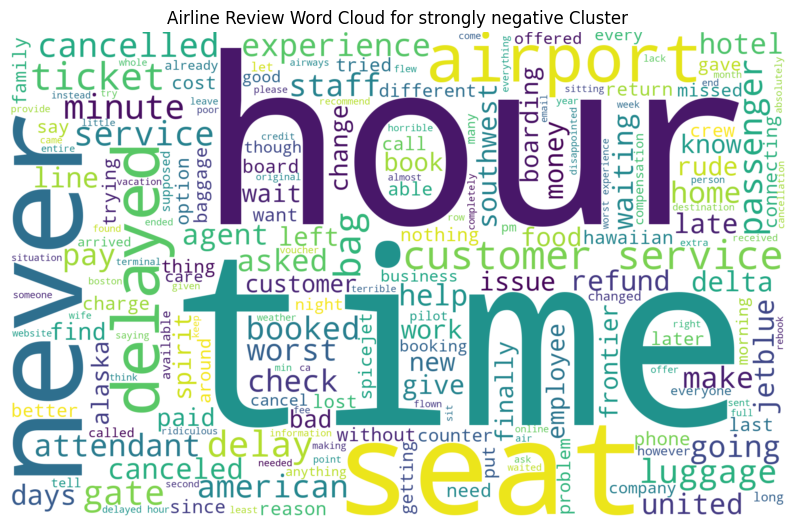

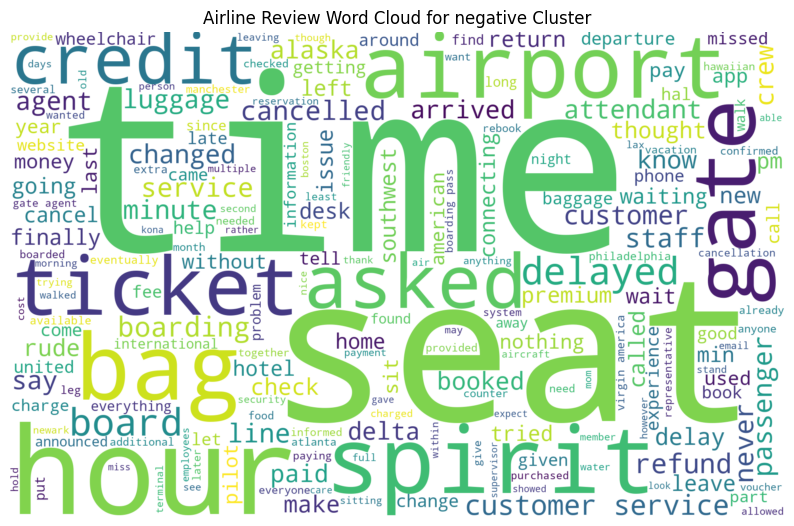

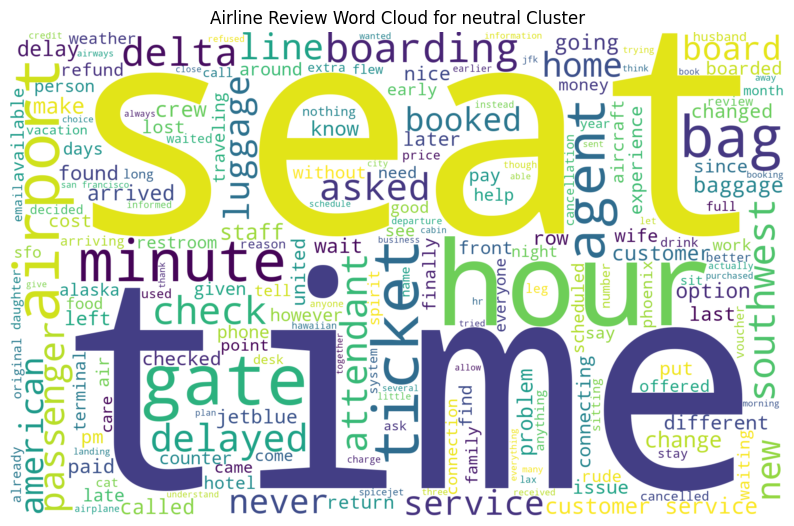

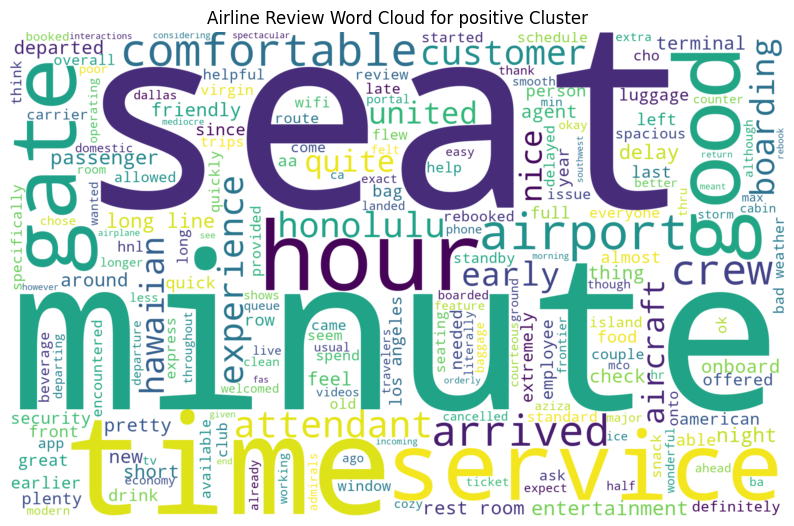

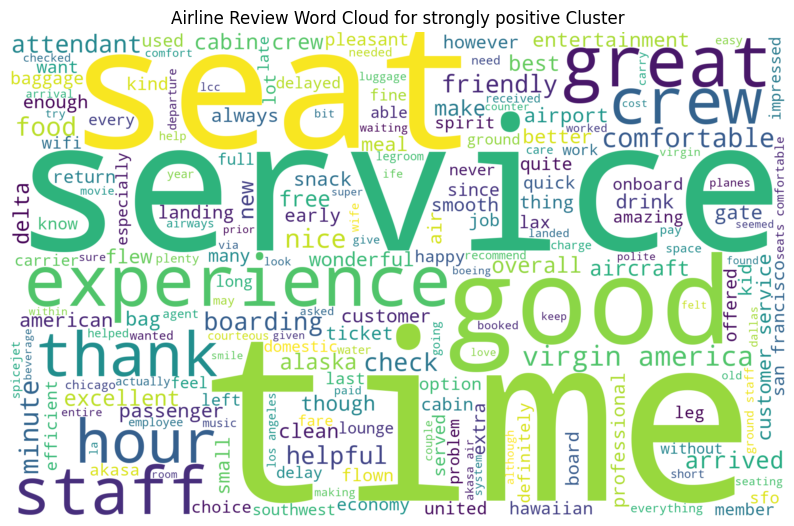

In [57]:
# setting up for word cloud
height = 1200
width = 1920
# max_words = 500

for sentiments in sentiments:
    # Extract reviews of the current cluster
    sentiments_cluster_reviews = df[df['Sentiment'] == sentiments]['processed_review'].fillna("").str.cat(sep=' ')

    # Generate word cloud
    wordcloud = WordCloud(width=width,height=height, background_color = 'white', stopwords = stop_words).generate(sentiments_cluster_reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Airline Review Word Cloud for {sentiments} Cluster")
    plt.show()
    print("\n \n")

    # save it as png file
    # wordcloud.to_file(f"Airline_Review_wordcloud_{sentiments}_cluster.png")

Topic 0:
0.009*"hour" + 0.008*"help" + 0.008*"service" + 0.008*"time" + 0.007*"southwest" + 0.006*"delayed" + 0.006*"cancelled" + 0.006*"home" + 0.005*"weather" + 0.005*"days"

Topic 1:
0.011*"service" + 0.010*"luggage" + 0.009*"time" + 0.008*"seat" + 0.007*"bag" + 0.006*"rude" + 0.006*"pay" + 0.005*"staff" + 0.005*"asked" + 0.005*"boarding"

Topic 2:
0.010*"seats" + 0.010*"seat" + 0.010*"service" + 0.009*"crew" + 0.008*"food" + 0.006*"delayed" + 0.006*"new" + 0.005*"cabin" + 0.005*"time" + 0.005*"staff"

Topic 3:
0.011*"service" + 0.011*"bag" + 0.008*"time" + 0.007*"bags" + 0.007*"american" + 0.007*"airport" + 0.006*"refund" + 0.006*"days" + 0.006*"seats" + 0.005*"spirit"

Topic 4:
0.015*"time" + 0.013*"delta" + 0.010*"service" + 0.007*"united" + 0.006*"delayed" + 0.006*"ticket" + 0.006*"staff" + 0.006*"worst" + 0.005*"hour" + 0.005*"family"

Topic 5:
0.010*"airport" + 0.009*"delayed" + 0.008*"passengers" + 0.007*"staff" + 0.007*"time" + 0.006*"seats" + 0.006*"minutes" + 0.006*"jetblu

Topic 0:
0.009*"alaska" + 0.006*"service" + 0.006*"family" + 0.005*"rude" + 0.005*"delayed" + 0.005*"kids" + 0.004*"time" + 0.004*"southwest" + 0.004*"united" + 0.004*"home"

Topic 1:
0.010*"service" + 0.009*"time" + 0.008*"seat" + 0.007*"airport" + 0.006*"line" + 0.006*"seats" + 0.005*"asked" + 0.004*"bag" + 0.004*"wait" + 0.004*"delayed"

Topic 2:
0.010*"service" + 0.009*"seats" + 0.009*"airport" + 0.008*"time" + 0.008*"american" + 0.006*"hotel" + 0.006*"seat" + 0.006*"delayed" + 0.005*"jetblue" + 0.005*"virgin_america"

Topic 3:
0.018*"time" + 0.008*"airport" + 0.007*"delayed" + 0.007*"luggage" + 0.006*"united" + 0.006*"service" + 0.006*"cancelled" + 0.005*"seats" + 0.005*"bags" + 0.005*"booked"

Topic 4:
0.008*"delayed" + 0.006*"airport" + 0.005*"hour" + 0.005*"minutes" + 0.005*"passengers" + 0.005*"bags" + 0.005*"jetblue" + 0.005*"delta" + 0.004*"ticket" + 0.004*"asked"

Topic 5:
0.013*"service" + 0.011*"spirit" + 0.009*"time" + 0.006*"worst" + 0.006*"hour" + 0.006*"delayed" + 0.0